##  Main Program for the Computing mini-project
Author: Joel Pérez Ferrer

SN: 18082660

Year 2019-2020

Group 7 (BrazilNuts), supervised by Zara Grout.

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [14]:
# Here we will be defining some constants:
radii = [0.5, 1.0]    # 0: regular nut, 1: Brazilian nut
h_allocation = 1.0    # Distance between each nut in the set-up
box_w = 5.0          # Width of the box

In [15]:
def display_box(nuts, positions, show_axis):
    """
    Displays the box of nuts.
    
    Args:
        nuts: array describing the type of every nut. 0: regular 1: brazilian.
        positions: 2D array describing the x and y coordinate of every nut.
        show_axis: bool on whether or not to display labels and values in the axes.
        
    Returns:
        Nothing, but outputs the rending in the screen.
    """
    circle_list = []
    for i in range(len(nuts)):
        if nuts[i] == 1:
            new_circle = plt.Circle(positions[i], radii[1], color='r')
            circle_list.append(new_circle)
        elif nuts[i] == 0:
            new_circle = plt.Circle(positions[i], radii[0], color='r')
            circle_list.append(new_circle)

    fig, ax = plt.subplots(figsize=(5, 10))
    
    ax.set_xlim([0, box_w])
    ax.set_ylim([0, 10])
    
    
    for drawn_circle in circle_list:
        ax.add_artist(drawn_circle)

In [16]:
def initial_preparation(max_n, b_nut_chance):
    """
    Prepares the initial set of nuts according to the document.
    Always starts with a brazilian nut at the bottom.
    
    Args:
        max_n: maximum number of nuts
        b_nut_chance: chance for a nut to be brazilian
    
    Returns: 
        nuts: array of the types of nuts generated. 1 is brazilian, 0 is regular
        positions: 2D array of the locations of the nuts
    """
    nuts = np.zeros(max_n)
    positions = np.zeros((max_n,2))
    
    current_h = radii[1]
    nuts[0] = 1
    positions[0] = np.array([rand.randrange(radii[1], box_w-radii[1]), current_h])
    n = 1
    current_h = radii[0] + radii[1]

    
    while n < max_n:
        current_h += 2*radii[0]
        nuts[n] = 0
        positions[n] = np.array([rand.uniform(radii[0], box_w-radii[0]), current_h])
        n += 1
    return nuts, positions

In [17]:
def check_overlap_walls(nut, position):
    """
    Checks if a nut in a given position overlaps with the bottom or the sides of the box
    
    Args: 
        nut: type of the nut
        position: array of the x and y coordinates of the nut
    Returns:
        bool True if the nut overlaps with the walls of the box
    """
    if position[0] >= radii[int(nut)] and position[0] <= box_w-radii[int(nut)] and position[1] > radii[int(nut)]:
        return False
    else: 
        return True

In [18]:
def check_overlap_nuts(nut1, position1, nut2, position2):
    """
    Checks if two nuts in the given positions overlap with each other 
    
    Args: 
        nut1: type of the first nut
        position1: array of the x and y coordinates of the first nut 
        nut2: type of the second nut
        position2: array of the x and y coordinates of the second nut 
    """
    if np.sqrt((position1[0]-position2[0])**2 + (position1[1]-position2[1])**2) > (radii[int(nut1)]+radii[int(nut2)]):
        return False
    else: 
        return True

In [19]:
def largest_nearest_neighbor(nuts, positions):
    """
    Returns the largest possible shortest distance between the given array of particles.
    
    Args:
        nuts: array containing the types of nuts
        positions: array containing the x and y corrdinates of the positions of the nuts
    Returns:
        largest_distance: largest distance found
        a: index of the first nut
        b: index of the second nut
    """
    largest_distance = 0
    a = 0
    b = 0
    for i in range(len(nuts)):
        for j in  range(len(nuts)):
            dij = np.sqrt((positions[i][0]-positions[j][0]-radii[int(nuts[i])]-radii[int(nuts[j])])**2 + (positions[i][1]-positions[j][1]-radii[int(nuts[i])]-radii[int(nuts[j])])**2)
            if dij > largest_distance:
                largest_distance = dij
                a = i
                b = j 
    return largest_distance, a, b

In [20]:
def energy(positions):
    """
    Calculates E/mg of the system given the positions of the nuts
    
    Args: 
        positions: x and y coordinates of the nuts
    Returns:
        Sum of E/mg for all the nuts in the system 
    """
    energy = 0
    for position in positions:
        energy += position[1]
    return energy

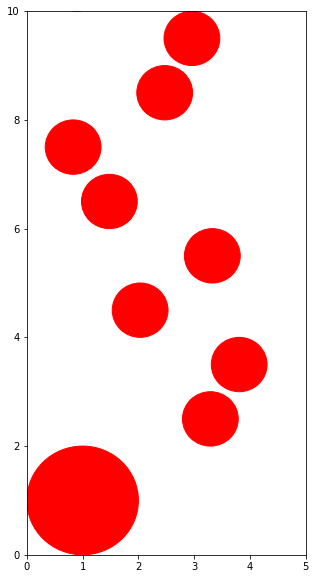

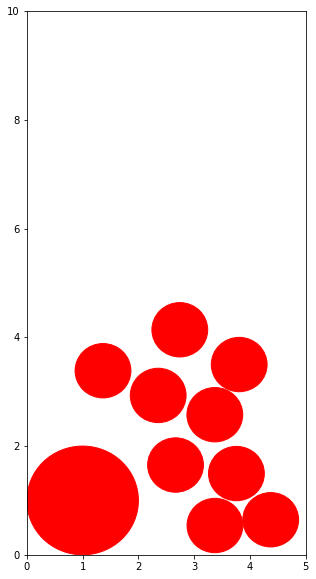

In [26]:
# Monte Carlo method

max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)

iters = 0
while iters < 30:
    iters += 1
    max_step_length = largest_nearest_neighbor(nuts,positions)[0]
    inner_iters = 0
    while inner_iters < 100:
        inner_iters += 1
        current = rand.randrange(max_n)
        x_step = rand.uniform(- max_step_length, max_step_length)
        y_step = rand.uniform(- max_step_length, 0)
        new_positions = np.copy(positions)
        new_nuts = np.copy(nuts)
        new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
        nuts_to_check = np.delete(new_nuts, current)
        positions_to_check = np.delete(new_positions,current, axis=0)
        
        # Testing for overlap with walls
        if check_overlap_walls(nuts[current], new_positions[current]):
                continue
        
        # Testing for collisions
        passed_collisions = True        
        for i in range(len(nuts_to_check)):
            if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                passed_collisions = False
                continue
        if not passed_collisions:
            continue
        
        # Test for energy:
        if energy(positions) > energy(new_positions):
            positions = new_positions
            valid_move = True
display_box(nuts, positions,0)
